<a href="https://colab.research.google.com/github/vishalrk1/tensorflow_course/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

**Importing Pizza steak data set and unziping it**

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-10-03 08:47:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  60.9MB/s    in 1.7s    

2021-10-03 08:47:08 (60.9 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



* Exploring data

In [3]:
!ls pizza_steak/

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

In [6]:
import os

for dirpath, dirnames, filename in os.walk('pizza_steak'):
  print(f"there are{len(dirnames)} directories and {len(filename)} images in '{dirpath}' ")

there are2 directories and 1 images in 'pizza_steak' 
there are2 directories and 1 images in 'pizza_steak/train' 
there are0 directories and 750 images in 'pizza_steak/train/steak' 
there are0 directories and 750 images in 'pizza_steak/train/pizza' 
there are2 directories and 1 images in 'pizza_steak/test' 
there are0 directories and 250 images in 'pizza_steak/test/steak' 
there are0 directories and 250 images in 'pizza_steak/test/pizza' 


* getting classes name programmatically

In [7]:
import pathlib

data_dir = pathlib.Path('pizza_steak/train')
classes = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = classes[1:]
print(class_names)

['pizza' 'steak']


* ploting Images

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up target folder
  target_folder = target_dir+target_class
  print(f"target_folder: {target_folder}")

  # get random image form folder
  random_image = random.sample(os.listdir(target_folder),1)
  print(f"Random Image: {random_image}")

  # Reading image and plotting image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image Shape: {img.shape}")

  return img

target_folder: pizza_steak/train/pizza
Random Image: ['979998.jpg']
Image Shape: (384, 512, 3)


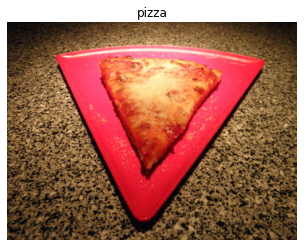

In [9]:
img = view_random_image(target_dir='pizza_steak/train/',target_class='pizza')

## Bulding an CNN model

* Load Images
* preprocessing
* build CNN
* fit CNN

In [10]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

**PreProcessing Data**

In [11]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setting up directories for data
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

#importing data from directories in batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42
                                               )

## CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## compile the model
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# fit the model
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 44s 256ms/step - loss: 0.5488 - accuracy: 0.7180 - val_loss: 0.4251 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4238 - accuracy: 0.8100 - val_loss: 0.3340 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3848 - accuracy: 0.8313 - val_loss: 0.3430 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3555 - accuracy: 0.8520 - val_loss: 0.2738 - val_accuracy: 0.8920
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3338 - accuracy: 0.8613 - val_loss: 0.3517 - val_accuracy: 0.8360


## Using normal neural network

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 3.4860 - accuracy: 0.6360 - val_loss: 0.6954 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.8157 - accuracy: 0.7160 - val_loss: 0.6873 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.7959 - accuracy: 0.6933 - val_loss: 0.5111 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5411 - accuracy: 0.7600 - val_loss: 0.5014 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.5690 - accuracy: 0.7553 - val_loss: 0.5173 - val_accuracy: 0.7660


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
 model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#Bulding CNN Model

* Become one with data
* Preprocess Data
* Create a CNN model

target_folder: pizza_steak/train/steak
Random Image: ['980247.jpg']
Image Shape: (384, 512, 3)
target_folder: pizza_steak/train/pizza
Random Image: ['269396.jpg']
Image Shape: (512, 384, 3)


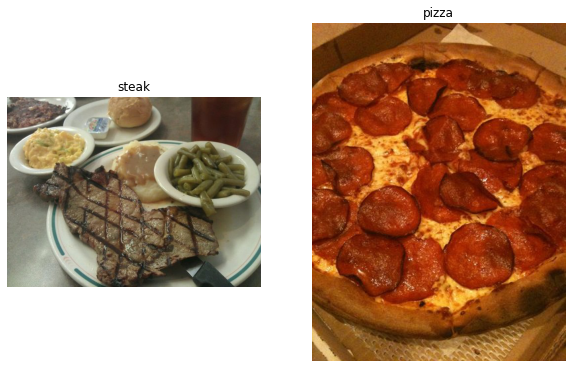

In [36]:
# ploting both classes images
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

**Preprocessing Data**

* data directory paths

In [27]:
# directories for dataet
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

* turning data in batches

In [29]:
# creating train and test data generator and rescale data
from tensorflow.keras.preprocessing import ImageDataGenerator

# scaling data by dividing tensor value by 255
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
# Loding data from directory and turning them in batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**Creating a CNN model**

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10, kernal_size=3, strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid'),
])